In [1]:
# Versão do Python
from platform import python_version
print(python_version())

3.11.5


In [2]:
# Imports
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sea 
import datetime as dt 

Carregando os Dados

In [3]:
# Careega o dataset
df = pd.read_csv('dados/dataset.csv')

In [4]:
# Shape
df.shape

(9700, 11)

In [5]:
# Amostra do dados
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [6]:
# Amostra dos dados
df.tail()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
9695,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.830
9696,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.320
9697,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.776
9698,CA-2017-105291,30/10/2017,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.620
9699,CA-2018-147032,31/07/2018,LB-16795,Home Office,United States,Wilmington,Delaware,OFF-PA-10003256,Office Supplies,Paper,11.540


Análise Exploratória

In [7]:
# Colunas do conjunto de dados
df.columns

Index(['ID_Pedido', 'Data_Pedido', 'ID_Cliente', 'Segmento', 'Pais', 'Cidade',
       'Estado', 'ID_Produto', 'Categoria', 'SubCategoria', 'Valor_Venda'],
      dtype='object')

In [8]:
# Verificando o tipo de cada coluna
df.dtypes

ID_Pedido        object
Data_Pedido      object
ID_Cliente       object
Segmento         object
Pais             object
Cidade           object
Estado           object
ID_Produto       object
Categoria        object
SubCategoria     object
Valor_Venda     float64
dtype: object

In [9]:
# Resumo estatístico da coluna com o valor de venda
df['Valor_Venda'].describe()

count     9700.000000
mean       230.469892
std        627.504252
min          0.444000
25%         17.248000
50%         54.272000
75%        209.932500
max      22638.480000
Name: Valor_Venda, dtype: float64

In [10]:
# Verificando se há valores duplicados
df[df.duplicated()]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda


In [11]:
# Verificando se há valores ausentes
df.isnull().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

In [12]:
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


Pergunta de Negócio 1:

Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'?

In [13]:
# Filtrando o dataframe com os registros da categoria desejada
df_p1 = df[df['Categoria'] == 'Office Supplies']

In [14]:
# Agrupando por cidade e calculando o valor de valor_venda
df_p1_total = df.groupby('Cidade')['Valor_Venda'].sum()

In [15]:
# Encontrando a cidade com maior valor de venda
cidade_maior_venda = df_p1_total.idxmax()
print("Cidade com maior valor de venda para 'Office Supplies': ", cidade_maior_venda)

Cidade com maior valor de venda para 'Office Supplies':  New York City


In [16]:
# Validando o resultado
df_p1_total.sort_values(ascending = False)

Cidade
New York City    251749.219
Los Angeles      171654.633
Seattle          114725.478
San Francisco    107489.952
Philadelphia     107197.803
                    ...    
Ormond Beach          2.808
Pensacola             2.214
Jupiter               2.064
Elyria                1.824
Abilene               1.392
Name: Valor_Venda, Length: 528, dtype: float64

Pergunta de Negócio 2:

Qual o Total de Vendas Por Data do Pedido?

    Resultado através de um gráfico de barras.

In [17]:
# Calculando o total de vendas para cada data de pedido
df_p2 = df.groupby('Data_Pedido')['Valor_Venda'].sum()

In [18]:
df_p2.head()

Data_Pedido
01/01/2018    1481.8280
01/02/2015     468.9000
01/02/2017     161.9700
01/03/2015    2203.1510
01/03/2016    1642.1744
Name: Valor_Venda, dtype: float64

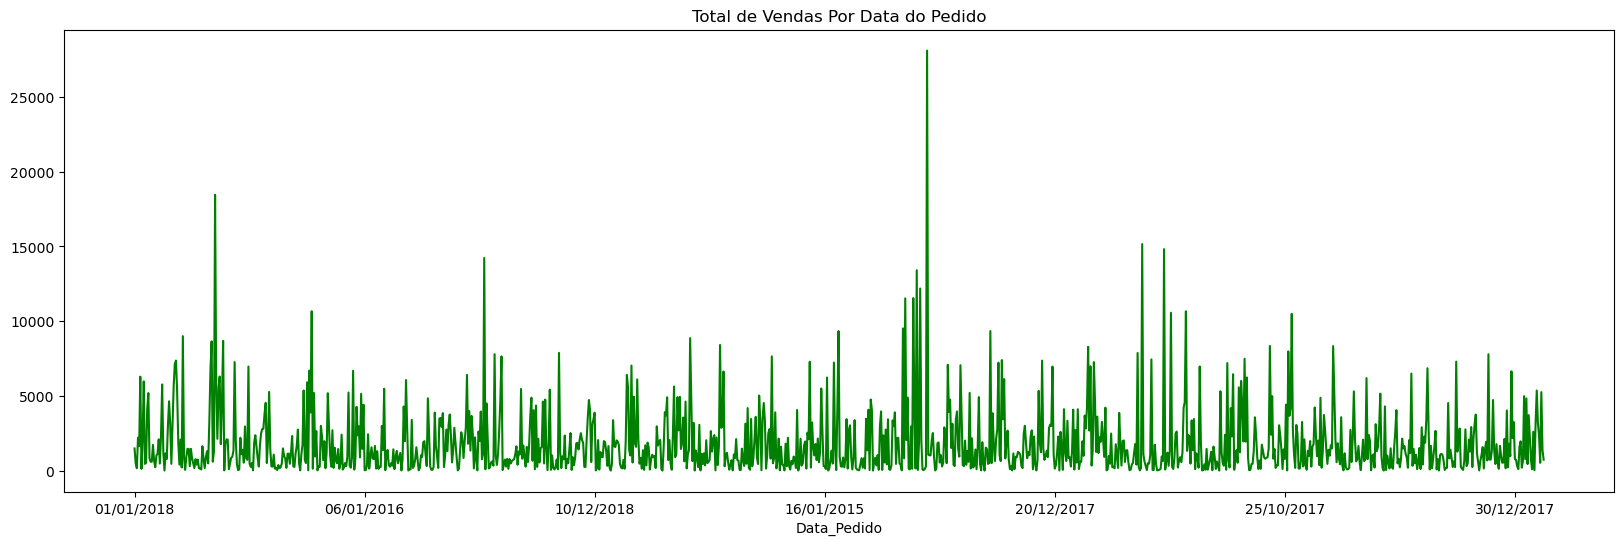

In [19]:
# Plot
plt.figure(figsize = (20, 6))
df_p2.plot(x = 'Data_Pedido', y = 'Valor_Venda', color = 'green')
plt.title('Total de Vendas Por Data do Pedido')
plt.show()

Pergunta de Negócio 3:

Qual o Total de Vendas por Estado?

    Resultado através de um gráfico de barras.

Pergunta de Negócio 4:

Quais São as 10 Cidades com Maior Total de Vendas?

    Resultado através de um gráfico de barras.

Pergunta de Negócio 5:

Qual Segmento Teve o Maior Total de Vendas?

    Resultado através de um gráfico de pizza.

Pergunta de Negócio 6:

Qual o Total de Vendas Por Segmento e Por Ano?

Pergunta de Negócio 7:

Os gestores da empresa estão considerando conceder diferentes faixas de descontos e gostariam de fazer uma simulação com base na regra abaixo:

    Se o Valor_Venda for maior que 1000 recebe 15% de desconto.
    Se o Valor_Venda for menor que 1000 recebe 10% de desconto.

Quantas Vendas Receberiam 15% de Desconto?

Pergunta de Negócio 8:

Considere Que a Empresa Decida Conceder o Desconto de 15% do Item Anterior. Qual Seria a Média do Valor de Venda Antes e Depois do Desconto?

Pergunta de Negócio 9:

Qual o Média de Vendas Por Segmento, Por Ano e Por Mês?

    Resultado através de gráfico de linha   

Pergunta de Negócio 10:

Qual o Total de Vendas Por Categoria e SubCategoria, Considerando Somente as Top 12 SubCategorias?

    Resultado de tudo através de um único gráfico.
